# Produit de convolution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.grid'] = True
# plt.rc('text', usetex=True)

## Avant propos

Le produit de convolution entre deux signaux $x$ et $y$ à temps discret est défini par :

$$
(x*y)[n] = \sum_{m=-\infty}^{+\infty} x[m]y[n-m].
$$

La fonction `numpy.convolve` calcule le produit de convolution et renvoie le résultat complet ou tronqué.

In [2]:
def print_nan(label, array):
    
    # Texte
    var = f'{label}\t'
    
    # Valeurs
    values = '[ '
    N = 0
    for n in array:
        if n == -1:
            values += f'\b     '
        else:
            values += f' {int(n):2d},'
            N += 1
    values += '\b ]'
    
    # Longueur 
    length = f'(len = {N})\t'
    
    # Affichage
    print(var + length + ":  " + values)


x = [7, 5, 2, 1, 4, 6, 3]
y = [6, 4, 8, 1, 2]

nx = np.arange(0, len(x))
ny = np.arange(0, len(y))

X = len(nx)
Y = len(ny)
M = min(X, Y)

print_nan('x', x)
print_nan('y', y)

dat = [
    ['full'],
    ['same'],
    ['valid'],
]
for mode, in dat:
    if mode == 'full':
        z = []
    if mode == 'same':
        z = -np.ones(int(np.floor((M-1)/2)))
    if mode == 'valid':
        z = -np.ones(M-1)
    w = np.convolve(x, y, mode=mode)
    w = np.concatenate([z, w, z])
    print_nan(f'"{mode}"', w)

x	(len = 7)	:  [   7,  5,  2,  1,  4,  6,  3, ]
y	(len = 5)	:  [   6,  4,  8,  1,  2, ]
"full"	(len = 11)	:  [  42, 58, 88, 61, 63, 72, 79, 66, 38, 15,  6, ]
"same"	(len = 7)	:  [            88, 61, 63, 72, 79, 66, 38,           ]
"valid"	(len = 3)	:  [                      63, 72, 79,                     ]


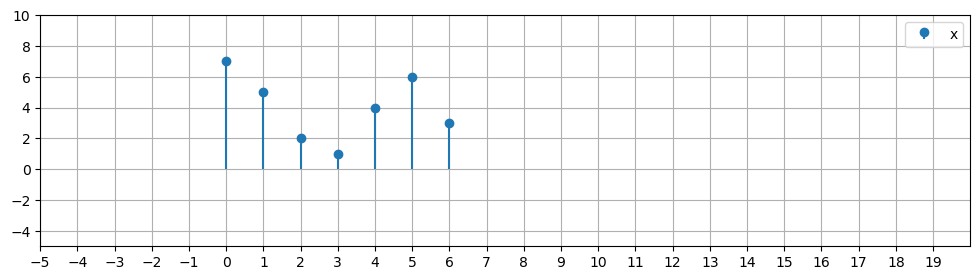

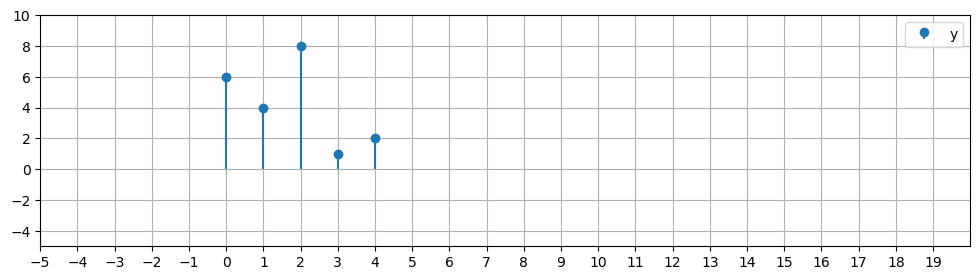

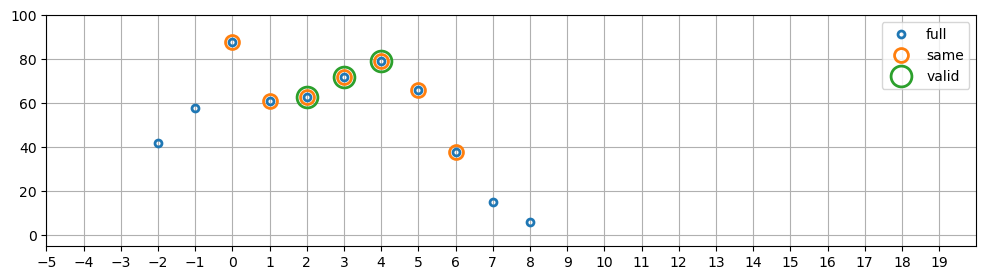

In [3]:
# x = [0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0]
# y = [0, 1, 0, -1]

nx = np.arange(0, len(x))
ny = np.arange(0, len(y))

X = len(nx)
Y = len(ny)

xlim = [-5, 20]
ylim = [-5, 10]

plt.figure(figsize=(12,3))
plt.stem(nx, x, basefmt=" ", label="x")
plt.xticks(range(xlim[0],xlim[-1]))
plt.xlim(xlim)
plt.ylim(ylim)
plt.legend()
plt.show()

plt.figure(figsize=(12,3))
plt.stem(ny, y, basefmt=" ", label="y")
plt.xticks(range(xlim[0],xlim[-1]))
plt.xlim(xlim)
plt.ylim(ylim)
plt.legend()
plt.show()

plt.figure(figsize=(12,3))
dat = [
    ['full',  'C0',  5],
    ['same',  'C1', 10],
    ['valid', 'C2', 15],
]
for mode, clr, ms in dat:
    z = np.convolve(x, y, mode=mode)
    if mode=='full':
        nz = np.arange(X+Y-1) - np.floor((Y-1)/2)
    if mode=='same':
        nz = nx
    if mode=='valid':
        nz = np.arange(X-Y+1) - np.floor((1-Y)/2)
    plt.plot(nz, z, marker='o', fillstyle='none', color=clr, linestyle='none', markersize=ms, markeredgewidth=2, label=mode)
plt.xticks(range(xlim[0],xlim[-1]))
plt.xlim(xlim)
plt.ylim([-5, 100])
plt.legend()
plt.show()

## Premier produit de convolution

Comme pour la porte, l'impulsion discrète est définie avec `numpy.where`.

Attention à l'utilisation de la fonction `numpy.arange` utilisée pour définir les abscissess !

In [4]:
n = np.arange(-10, 10+1)

x = np.sin(2*np.pi*n/10)
y = np.where( n==5 , 3, 0)

z = np.convolve(x, y, mode="same")

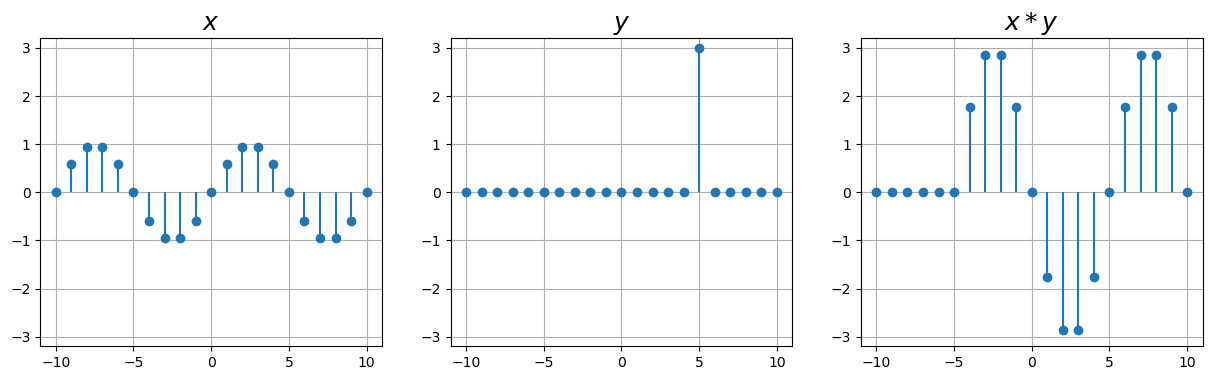

In [5]:
ylim=[-3.2, 3.2]
titles = ["x", "y", "x*y"]
plt.figure(figsize=(15,4))
for i, s in enumerate([x, y, z]):
    plt.subplot(1,3,i+1)
    plt.stem(n, s, basefmt=" ")
    plt.ylim(ylim)
    plt.title(f"${titles[i]}$", fontsize=18)
plt.show()

* On voit là l'effet de la convolution par une impulsion discrète :
  le signal $x$ est décalé de 5 échantillons (lieu de l'impulsion) et amplifié de 3 (amplitude de l'impulsion).
* Mais comment expliquer la présence d'échantillons nuls en début du signal $x*y$ ?

## Deuxième produit de convolution

In [6]:
n = np.arange(-10, 10+1)

x = np.where( np.absolute(n)==1 , 1, 0) + np.where( n==0 , 2, 0)
y = np.where( n==-1 , -1, 0) + np.where( n==1 , 1, 0)

z = np.convolve(x, y, mode="same")

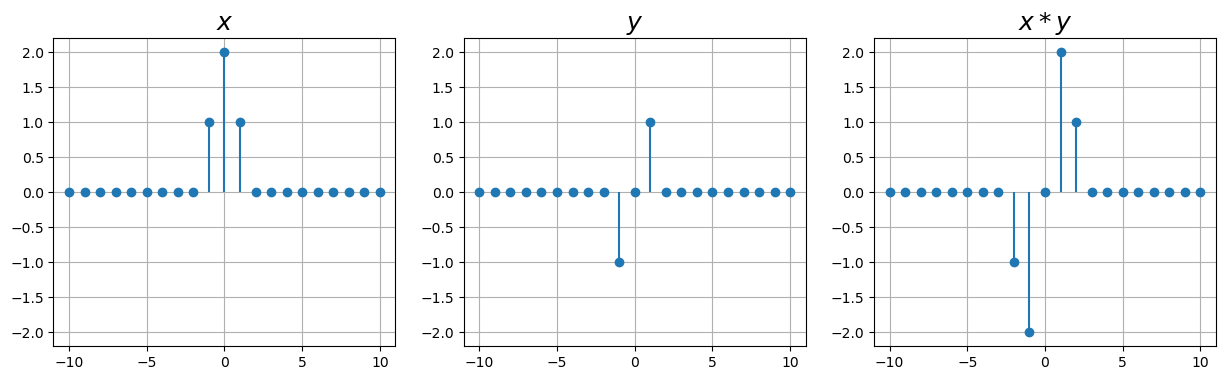

In [7]:
ylim=[-2.2, 2.2]
titles = ["x", "y", "x*y"]
plt.figure(figsize=(15,4))
for i, s in enumerate([x, y, z]):
    plt.subplot(1,3,i+1)
    plt.stem(n, s, basefmt=" ")
    plt.ylim(ylim)
    plt.title(f"${titles[i]}$", fontsize=18)
plt.show()

Détail du calcul du produit de convolution :

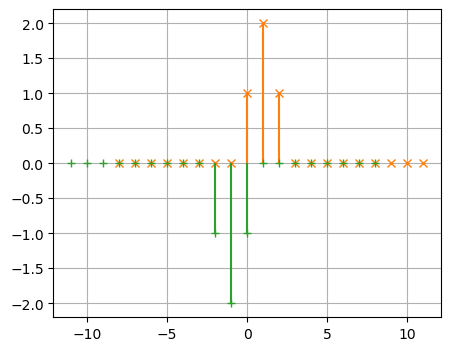

In [8]:
ylim=[-2.2, 2.2]
titles = ["x", "y", "x*y"]
plt.figure(figsize=(5,4))
plt.stem(n[1:]+1, x[1:], basefmt=" ", linefmt="C1", markerfmt="C1x")
plt.stem(n[:-1]-1, -x[:-1], basefmt=" ", linefmt="C2", markerfmt="C2+")
plt.ylim(ylim)
# plt.title(f"${titles[i]}$", fontsize=18)
plt.show()

* Comme précédemment, la convolution par chaque impulsion de $y$ va décaler et amplifer le signal $x$ d'autant. La convolution de la somme étant la somme des convolutions (opération linéaire), alors le résultat $x*y$ est la somme des deux convolutions.

## Troisième produit de convolution

In [9]:
# https://www.kaggle.com/robikscube/hourly-energy-consumption
x = np.loadtxt("../_static/AEP-2005.csv", delimiter=',', skiprows=0)
N = len(x)
t = np.arange(N) / 24 + 1

D = 24*7
y = np.ones(D) / D
t2 = np.arange(len(y)) / 24

FileNotFoundError: ../_static/AEP-2005.csv not found.

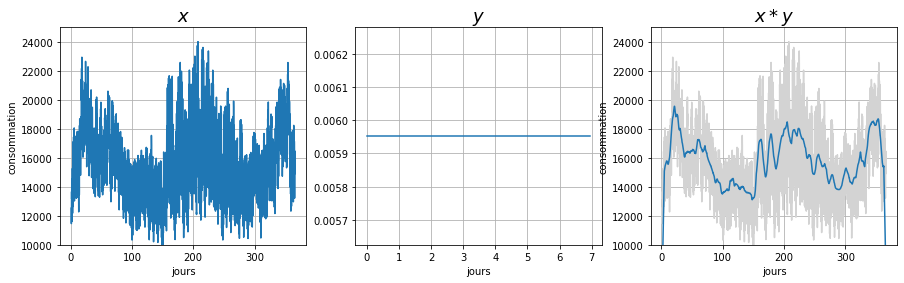

In [10]:
z = np.convolve(x, y, mode="same")

plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.plot(t, x)
plt.ylim([10e3, 25e3])
plt.title("$x$", fontsize=18)
plt.xlabel('jours')
plt.ylabel('consommation')

plt.subplot(1,3,2)
plt.plot(t2, y)
plt.title("$y$", fontsize=18)
plt.xlabel('jours')

plt.subplot(1,3,3)
plt.plot(t, x, color='lightgray')
plt.plot(t, z)
plt.ylim([10e3, 25e3])
plt.title("$x*y$", fontsize=18)
plt.xlabel('jours')
plt.ylabel('consommation')

plt.show()

* La convolution par un porte revient à calculer chaque échantillon de $x*y$ comme la moyenne de 24×7 échantillons de $y$.
* On procède donc à un moyennage du signal, qui a pour effet d'adoucir (lisser) le signal très perturbé ("bruité") par une porte.
  C'est une véritable technique pour débruiter un signal.